In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import quandl
import datetime
style.use('ggplot')

In [2]:
start_date = datetime.date(2017,1,3)
end_date = datetime.date.today()

In [4]:
quandl.ApiConfig.api_key = "Ww3nQE9dzvxuERsPszzZ"

In [6]:
df = quandl.get('WIKI/AAP.4', start_date=start_date, end_date=end_date, collapse="daily")
df = df.reset_index()
prices = df['Close'].tolist()
dates = df.index.tolist()

In [9]:
#Convert to 1d Vector
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))

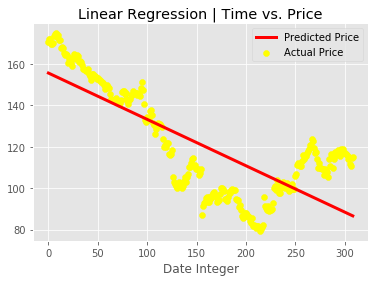

In [10]:
#Define Linear Regressor Object
regressor = LinearRegression()
regressor.fit(dates, prices)

#Visualize Results
plt.scatter(dates, prices, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(dates, regressor.predict(dates), color='red', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()


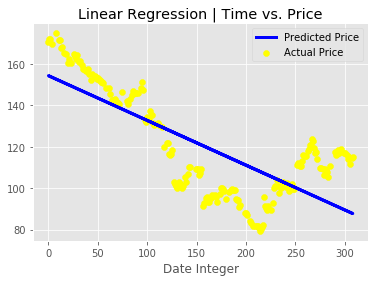

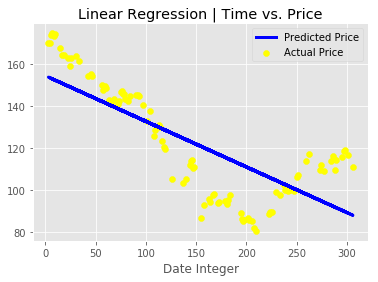

In [13]:
#Splitting the dataset into the Training set and Test set
xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, test_size=0.33, random_state=42)
regressor.fit(xtrain, ytrain)

#Train Set Graph
plt.scatter(xtrain, ytrain, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtrain, regressor.predict(xtrain), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

#Test Set Graph
plt.scatter(xtest, ytest, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, regressor.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

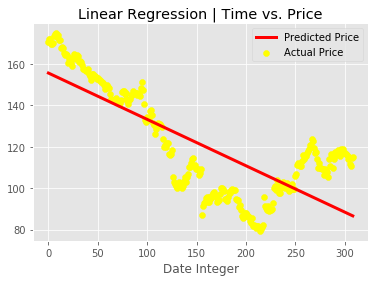

ValueError: Expected 2D array, got scalar array instead:
array=10.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [12]:
#Define Linear Regressor Object
regressor = LinearRegression()
regressor.fit(dates, prices)

#Visualize Results
plt.scatter(dates, prices, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(dates, regressor.predict(dates), color='red', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

#Predict Price on Given Date
date = 10
predicted_price =regressor.predict(date)
print(predicted_price[0][0],regressor.coef_[0][0] ,regressor.intercept_[0])